Ce cours de traitement d'images 2D est divisé en 5 modules (numérotés de 0 à 4 !) :
- n°0 : Représentations des images
- n°1 : Filtrage d'images numériques
- n°2 : Extraction de points d'intérêt
- n°3 : Segmentation d'images
- n°4 : Descripteurs d'images

Chaque module peut (devrait pouvoir…) être suivi en environ 2h, plus un exercice de 30 minutes qui clôture chaque séance.

Ce cours n'a pas vocation à vous faire devenir des spécialistes de la vision par ordinateur et du traitement d'images mais plutôt à vous convaincre que :
- la vision par ordinateur est un sujet intéressant et indispensable pour les applications interactives,
- la mise en application du traitement d'images n'est pas si difficile que ça,
- `scikit-image` est une bibliothèque logicielle formidable.

**Pré-requis :**
- savoir programmer avec Python,
- connaître les bases de [NumPy](https://numpy.org/),
- avoir des notions de traitement du signal (transformée de Fourier, notamment),
- un niveau post-bac en mathématiques (intégration/dérivation, multiplication matricielle),
- un peu de motivation !

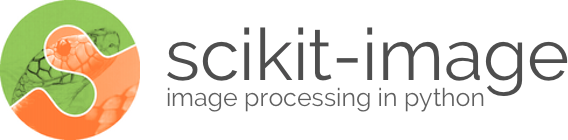

[**scikit-image**](https://scikit-image.org/) est une bibliothèque de traitement d'images pour Python qui implémente de nombreux algorithmes classiques et modernes pour l'analyse d'images et la vision artificielle. Elle fait partie de l'écosystème scientifique `scikit`. `scikit-image` est *open source* et libre d'utilisation (licence BSD). Ce cours doit beaucoup à la très riche et très bien écrite [documentation de `scikit-image`](https://scikit-image.org/docs/stable/index.html) et notamment à sa [galerie d'exemples](https://scikit-image.org/docs/stable/auto_examples/).

# Découverte de scikit-image

Pour débuter, découvrons `scikit-image`. Il s'agit d'une bibliothèque Python de traitement d'images qui s'appuie sur `numpy`. Commencer à utiliser `scikit-image` est très simple, il suffit d'importer le module `skimage`:

In [ ]:
import skimage

Tant qu'à faire, nous allons importer d'autres modules utiles :

- `numpy` pour la manipulation de matrices/tableaux,
- `matplotlib` pour l'affichage graphique.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Manipulation d'image

Examinons une image d'exemple. Celle-ci est préintégrée dans `scikit-image`, nous verrons plus tard comment charger nos propres fichiers. Comme tout bon exemple, il s'agit d'une photo qui représente un chat:

In [ ]:
image = skimage.data.cat()

**Question**: par quel objet Python est représenté cette image ? Utilisez `type` pour vérifier.

In [ ]:
type(image)

`matplotlib` permet facilement d'afficher cette image en utilisant la méthode `imshow`. Essayons :

In [ ]:
plt.imshow(image)
plt.show()

**Question** : quelles sont les dimensions de cette image (hauteur et largeur en pixels) ? Vérifier avec l'attribut `shape` du tableau NumPy correspondant. Y a-t-il quelque chose de surprenant dans les valeurs renvoyées par `shape` ?

`scikit-image` expose un sous-module `io` qui permet de lire (et d'écrire !) des fichiers image de toutes sortes dans de nombreux formats (JPEG, TIFF, BMP, PNG…). Importons ce module :

In [ ]:
from skimage import io

In [ ]:
image = io.imread("images/Homer.png")
plt.imshow(image) and plt.show()

### NumPy pour les images

Comme nous l'avons remarqué plus haut, une image est représentée par une (ou plusieurs matrices) qui forment un tableau NumPy (de type `ndarray`). Ce tableau se manipule assez facilement ce qui permet de faire de nombreuses opérations. Prenons une image simple en niveaux de gris :

In [ ]:
camera = skimage.data.camera()
plt.imshow(camera, cmap="gray")
plt.title(f"L'image est de taille {camera.shape}")
plt.show()

Cette image est représentée en mémoire par un tableau de $512\times512$ pixels. Chaque pixel contient une valeur entière codée sur 8 bits (entier positif entre 0 et 255):

In [ ]:
print(camera)
print(f"Le type des valeurs est : {camera.dtype}")

En règle générale, les images sont représentés selon l'une des deux conventions suivantes :
1. `uint8`, c'est-à-dire des entiers entre 0 et 255,
2. `float`, c'est-à-dire des valeurs réelles entre 0 et 1 (parfois entre -1 et 1).

Le premier format est le plus courant quand on lit ou quand on écrit un fichier car il prend moins de place en mémoire. En revanche, pour le traitement d'image, c'est le second que l'on va privilégier. `scikit-image` propose des fonctions utilitaires (`skimage.util.img_as_float` et `skimage.util.img_as_ubyte`) qui permettent de convertir d'un format à l'autre mais cette transformation est la plupart du temps réalisée automatiquement.

In [ ]:
skimage.util.img_as_float(camera)

Puisqu'il s'agit d'un tableau NumPy, toutes les [opérations de `numpy`](https://numpy.org/doc/stable/user/absolute_beginners.html) sont disponibles ! Par exemple, il est très facile de trouver les valeurs minimum, maximum et moyenne des pixels de cette image :

In [ ]:
camera.min(), camera.max(), camera.mean()

En utilisant l'indicage de NumPy, on peut accéder à un pixel précis :

In [ ]:
camera[10, 20]

Mais aussi le modifier :

In [ ]:
camera[10, 20] = 0

On peut aussi utiliser le *slicing* pour accéder à des pans entiers de l'image, par exemple pour ne conserver que les 10 colonnes lignes :

In [ ]:
subimage = camera[:, :10]
print(subimage)
print(subimage.shape)

**Question** : faire en sorte que tous les pixels des 10 premières lignes soient peints en noir.

Il est aussi possible d'accéder à des parties non régulières de l'image en créant des masques. Un masque n'est en réalité rien d'autre qu'un tableau de booléens qui vaut `True` pour les pixels que l'on souhaite garder et `False` pour les autres. Par exemple, on peut peindre en blanc tous les pixels dont l'intensité est inférieure à 20 :

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.add_subplot(131)
plt.imshow(camera, cmap="gray")
plt.title("Image de départ")

fig.add_subplot(132)
mask = camera < 20 # seuil d'intensité
plt.imshow(mask, cmap="gray")
plt.title("Masque")

fig.add_subplot(133)
camera[mask] = 255 # on peint en blanc
plt.imshow(camera, cmap="gray")
plt.title("Image modifiée")

plt.show()

Une fois que l'on a modifié son image comme désiré, le sous-module `io` de `scikit-image` expose une fonction `imsave` bien pratique qui permet d'encoder l'image dans le format désiré et de l'enregistrer sur le disque. On peut ainsi sauvegarder notre chef d'œuvre :

In [ ]:
io.imsave("chef_doeuvre.jpg", camera)

Vous pouvez vérifier avec votre explorateur de fichiers et réaliser que notre superbe image de caméraman a bien été sauvegardée.

## Images en couleur

Les images en couleur fonctionnent sur le même principe, à l'exception que ces dernières sont représentées par plusieurs canaux :

In [ ]:
cat = skimage.data.cat()
print(cat.shape)
plt.imshow(cat) and plt.show()

Le *slicing* s'utilise de la même façon, il faut simplement tenir compte de la 3ème dimension. Par exemple on peut accéder au deuxième canal (ce qui donne une image en niveaux de gris) :

In [ ]:
plt.imshow(cat[:,:,1], cmap="gray") and plt.show()

La convention de `scikit-image` est d'utiliser :
- un tableau 2D pour les images en niveaux de gris (lignes, colonnes),
- un tableau 2D « multi-canal » pour les images couleur (lignes, colonnes, canaux).

*Note*: `scikit-image` gère aussi les images 3D (les vidéos ou les scanners IRM, par exemple) mais on ne s'en préoccupera pas dans ce cours.

### Espaces de couleurs

La façon la plus courante de représenter une image couleur est d'utiliser l'espace RVB (Rouge-Vert-Bleu ou RGB pour *Red-Green-Blue*). C'est la convention utilisée par `scikit-image`. Autrement dit, les trois canaux de notre image correspondent respectivement aux intensités des pixels en rouge, vert et bleu. C'est un espace assez courant car les couleurs rouge, vert et bleu correspondent aux trois types de cônes de la rétine humaine.

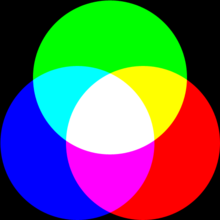

C'est le codage des couleurs le plus utilisé car les écrans utilisent la synthèse additive RVB pour produire une couleur en combinant l'intensité de trois sources : une source verte pure, une bleue pure et une rouge pure. En général, on encode l'intensité de chaque canal par un entier entre 0 et 255.

Quelques points de repères pratiques :
- (0, 0, 0) correspond au noir absolu,
- (255, 255, 255) correspond au blanc,
- (255, 0, 0), (0, 255, 0) et (0, 0, 255) correspondent respectivement au rouge pur, vert pur et bleu pur,
- ($\alpha$, $\alpha$, $\alpha$) correspond au gris d'intensité $\alpha$.

Si l'on observe notre image couleur, on constate qu'elle a pour dimensions : $(h, w, c)$ avec $h$ le nombre de lignes, $w$ le nombre de colonnes et $c$ le nombre de canaux (pour une image en couleur, $c=3$).

La signification des canaux dépend de la façon dont on a encodé la couleur mais pour du RVB, chaque canal correspond à la couleur primaire correspondante :

In [ ]:
fig = plt.figure(figsize=(15, 8))
for i, c in enumerate(["Rouge", "Vert", "Bleu"]):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(cat[:,:,i], cmap="gray")
    plt.title(c)
plt.show()

L'encodage RVB n'est pas le seul encodage possible des couleurs. Il existe ainsi l'encodage TSV (Teinte, Saturation, Valeur ou HSV en anglais pour *Hue Saturation Value*) qui décompose une couleur en:
- sa teinte, représentée par un angle sur le cercle des couleurs,
- sa saturation, c'est-à-dire l'intensité (ou la pureté) de la couleur,
- sa valeur, c'est-à-dire sa luminosité (ou sa brillance).

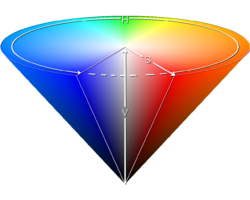

Cet espace est moins pratique pour un ordinateur mais est plus facile d'interprétation pour les humains car on perçoit plus facilement la signification d'un changement de l'une de ces valeurs.

Le sous-module `color` de `skimage` contient toutes les fonctions utiles pour réaliser des conversions entre espaces de couleur.

Par exemple, pour passer de RVB à TSV avec `skimage`:

In [ ]:
from skimage import color
cat_hsv = color.rgb2hsv(cat)

fig = plt.figure(figsize=(15, 8))
for i, c in enumerate(["Teinte", "Saturation", "Valeur"]):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(cat_hsv[:,:,i], cmap="gray")
    plt.title(c)
plt.show()

Cela fonctionne aussi entre d'autres espaces, par exemple pour convertir de TSV vers L\*a\*b\*:

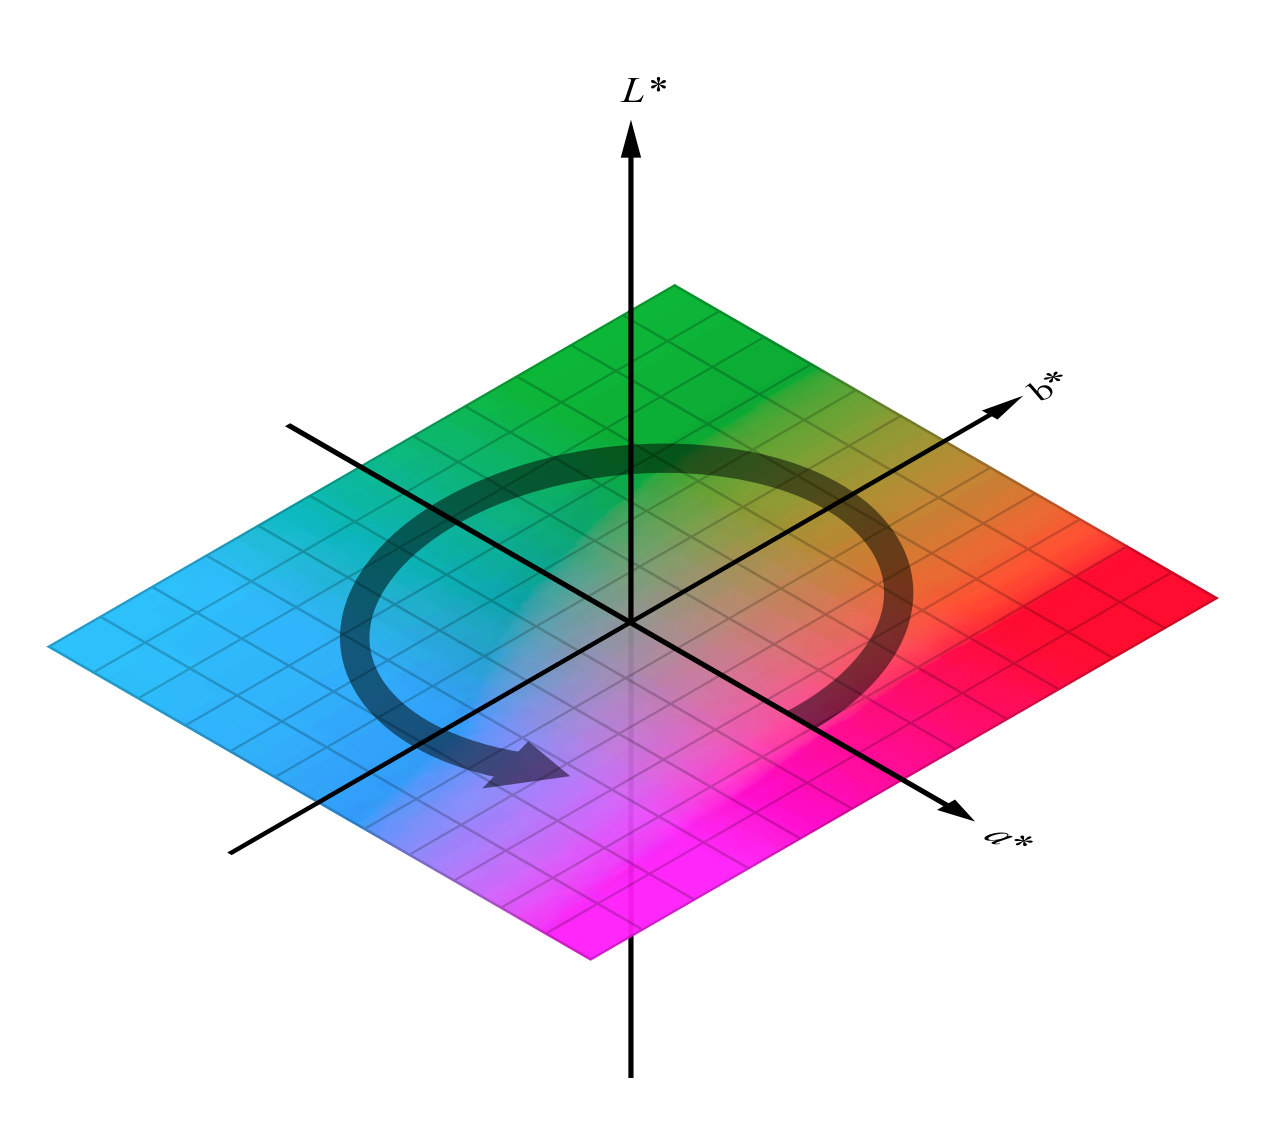

In [ ]:
cat_lab = color.rgb2lab(cat)

fig = plt.figure(figsize=(15, 8))
for i, c in enumerate(["L*", "a*", "b*"]):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(cat_lab[:,:,i], cmap="gray")
    plt.title(c)
plt.show()

**Attention !** Certaines transformations sont irréversibles car elles provoquent une perte d'information. C'est le cas de la conversion d'une image en couleur vers une image en niveaux de gris :

In [ ]:
cat_gray = color.rgb2gray(cat)

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.imshow(cat)
plt.title(cat.shape)
fig.add_subplot(122)
plt.imshow(cat_gray, cmap="gray")
plt.title(cat_gray.shape)
plt.show()

La transformation inverse `gray2rgb` se contente de recopier l'image en niveaux de gris dans chacun des canaux d'une image RVB:

In [ ]:
cat_gray2rgb = color.gray2rgb(cat_gray)

fig = plt.figure(figsize=(15, 8))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(cat[:,:,i], cmap="gray")
plt.title("Canaux RVB de départ")
plt.show()

fig = plt.figure(figsize=(15, 8))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(cat_gray2rgb[:,:,i], cmap="gray")
plt.title("Résultat de `gray2rgb`")
plt.show()

### Histogrammes d'intensité

Un concept couramment utilisé en traitement d'image est la notion d'**histogramme d'une image**. Pour une image en niveaux de gris, cela revient à tracer l'histogramme des intensités pour tous les pixels :

In [ ]:
from skimage.exposure import histogram

values, bins = histogram(cat_gray, nbins=20)

plt.bar(bins, values, width=bins[1] - bins[0], edgecolor='k')
plt.title("Histogramme de l'image du chat en niveaux de gris")
plt.xlabel("Intensité du pixel")
plt.ylabel("Nombre de pixels")
plt.show()

**Question** : quel est le nombre de classes maximum que l'on peut considérer dans l'histogramme (autrement dit, quelle est la valeur maximale pour le paramètre `nbins` dans le cas général) ?

### Contraste et exposition

In [ ]:
from skimage import exposure

Le **contraste** d'une image correspond à la différence de luminosité entre les zones sombres et les zones claires de l'image. Une image avec un contraste nul est entièrement grise tandis qu'une image de contraste maximale contient soit uniquement des pixels soit blancs, soit noirs. On parle aussi de dynamique de l'image pour désigner le rapport entre la valeur de luminosité la plus élevée et la plus faible.

Voici un exemple d'image avec un contraste faible. On affiche également l'histogramme de l'intensité des pixels :

In [ ]:
moon = skimage.util.img_as_float(skimage.data.moon())

def plot_image_and_hist(image, bins=256, title=None):
    fig = plt.figure(figsize=(15, 6))
    fig.add_subplot(121)
    plt.imshow(image, cmap="gray")
    if title is None:
        title = "Image"
    plt.title(title)
    
    fig.add_subplot(122)
    plt.hist(image.ravel(), bins=bins)
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    plt.plot(bins, img_cdf * 20000, 'r')
    plt.xlim(0, 1)
    plt.title("Intensité des pixels")
    plt.show()

plot_image_and_hist(moon)

Une façon d'améliorer le contraste est simplement d'étirer les valeurs de sorte à occuper toute la plage disponible, c'est-à-dire à ce que $\min(I) = 0$ et $\max(I) = 1$:

$$I_\text{étirée} = \frac{I - \min(I)}{\max(I) - \min(I)}$$

Cette technique est implémentée dans la fonction `skimage.exposure.rescale_intensity`. 

Mais pour l'image ci-dessus, c'est déjà le cas. Il y a simplement très peu de pixels très sombres et très peu de pixels très clairs.

Une solution est d'utiliser une correction du gamma de l'image en appliquant la transformation :
    
$$I_\text{corrigée} = I^\gamma$$

Pour $\gamma \gt 1$, l'histograme va se déplacer vers la gauche et l'image corrigée sera plus sombre que l'image de départ.
Pour $\gamma \lt 1$, c'est l'inverse. Essayez avec quelques valeurs de gamma !

In [ ]:
gamma = 0.5
plot_image_and_hist(moon ** gamma, title=f"Correction gamma = {gamma}")

La fonction `skimage.exposure.adjust_gamma` implémente cette transformation.

Enfin, une dernière technique bien pratique pour forcer l'image à « égaliser » sa luminosité et à bien occuper toute la dynamique autorisée est l'égalisation par histogrammes. L'idée consiste à aplanir l'histogramme d'intensité de telle sorte que l'histogramme cumulé soit quasiment linéaire :

In [ ]:
moon_eq = exposure.equalize_hist(moon, nbins=256)
plot_image_and_hist(moon_eq, title="Égalisation par histogramme")

# Seuillage d'image

Le seuillage d'image est une technique classique mais simple et rapide qui permet de binariser une image, c'est-à-dire de transformer une image en niveau de gris (ou en couleurs) en une image en noir et blanc dont les pixels valent soit 0, soit 1.

Fondamentalement, le seuillage consiste à réaliser l'opération :
$$\hat{I}[i,j] = \begin{cases}
                     & 1 ~~~\text{ si } I[i,j] \geq \tau\\ 
                     & 0 ~~~\text{ sinon }
                  \end{cases}$$
c'est-à-dire à transformer une image $I$ en une image binaire $\hat{I}$ en mettant des 1 (blanc) partout où la valeur du pixel est supérieure à un seuil $\tau$ et des 0 (noir) partout ailleurs.

On parle alors de seuillage **global**.

Ce type de seuillage est très facile à réaliser avec NumPy et nous l'avons d'ailleurs fait tout à l'heure lorsque nous avons créé le masque sur l'image du caméraman:

In [ ]:
threshold = 20
camera = skimage.data.camera()
camera_binarized = np.copy(camera)
camera_binarized[camera >= threshold] = 255
camera_binarized[camera < threshold] = 0

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(camera, cmap="gray")
fig.add_subplot(122)
plt.imshow(camera_binarized, cmap="gray")
plt.title("Image seuillée")
plt.show()

**Question** : essayez quelques valeurs du seuil pour trouver celle qui vous semble préférable.

Une question que l'on peut se poser est : comment choisir la valeur *idéale* de $\tau$ ? Une façon de faire est de considérer l'histogramme des valeurs d'intensité :

In [ ]:
plt.hist(camera.ravel(), bins=256) # histogramme des 256 valeurs possibles
plt.axvline(threshold, color='r', label="Seuil")  # affiche la valeur du seuil
plt.legend()
plt.show()

Intuitivement, on aimerait choisir un seuil qui « sépare bien » les valeurs en deux groupes distincts (les blancs et les noirs). Une méthode qui fonctionne généralement bien est la méthode d'Otsu. Elle consiste à chercher le seuil optimal, c'est-à-dire celui qui minimise la variance intra-classe au sein des pixels blancs et des pixels noirs.

Formellement, si on note $t$ la valeur du seuil, alors cela définit deux groupes de pixels :
- les pixels du groupe 1, qui ont une intensité inférieure à $t$;
- les pixels du groupe 2, qui ont une intensité supérieure ou égale à $t$.

Notons $w_1(t)$ (resp. $w_2(t)$) la fraction des pixels appartenant au groupe 1 (resp. groupe 2) pour le seuil $t$. On note également $\sigma_1^2(t)$ (resp. $\sigma_2^2(t)$) la variance de l'intensité des pixels du groupe 1 (resp. groupe 2).

L'objectif de la méthode est de minimiser la variance intra-classe, c'est-à-dire de trouver $t$ tel que la quantité suivante :

$$\sigma_w^2 = w_1(t) \sigma_1(t) + w_2(t) \sigma_2^2(t)$$

soit minimale.

Cette méthode est implémentée dans `scikit-image` dans le sous-module `filters` :

In [ ]:
from skimage import filters

In [ ]:
otsu_threshold = filters.threshold_otsu(camera)
camera_binarized = camera > otsu_threshold

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(camera, cmap="gray")
fig.add_subplot(122)
plt.imshow(camera_binarized, cmap="gray")
plt.title("Image seuillée")
plt.show()

Un inconvénient des techniques de seuillage global est qu'elles ne prennent pas en compte le fait que différentes régions de l'image peuvent être éclairées différemment. L'image ci-dessous est typique de ce genre de problème (et le seuillage d'Otsu ne règle rien) :

In [ ]:
image = skimage.data.page()
otsu_threshold = filters.threshold_otsu(image)
binarized = image > otsu_threshold

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(image, cmap="gray")
fig.add_subplot(122)
plt.imshow(binarized, cmap="gray")
plt.title("Image seuillée")
plt.show()

Le problème est que la gauche de l'image est moins intense que la droite (l'éclairage est inégal, probablement à cause d'une ombre portée). Quelle solution pour ce problème ? Et si le seuil ne devait pas être choisi globalement, mais **localement**. C'est par exemple ce que fait le seuillage de Niblack, où le seuil est calculé par :

$$\tau[i,j] = \mu_{i,j} - k \cdot \sigma_{i,j}$$

où :
- $\mu_{i,j}$ (resp. $\sigma_{i,j}$) est la moyenne des intensités (resp. l'écart-type) dans une fenêtre de 15 pixels autour du pixel $[i,j]$,
- $k$ est un paramètre à régler ($k = 0,2$ par défaut).

Ce seuillage est également implémenté dans `scikit-image`. Il est possible de régler la taille de la fenêtre ainsi que la valeur de $k$:

In [ ]:
threshold_mask = filters.threshold_niblack(image, window_size=15, k=0.2)
binarized = image > threshold_mask

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(image, cmap="gray")
fig.add_subplot(122)
plt.imshow(binarized, cmap="gray")
plt.title("Image seuillée")
plt.show()

**Question** : quel problème constatez-vous ? Pourquoi ?

Une solution est d'utiliser la méthode de Sauvola qui est une variante de la précédente. Elle est particulièrement adaptée à la binarisation d'images de texte. En effet, le seuil $\tau$ est désormais obtenu par:

$$\tau[i,j] = \mu_{i,j} \cdot \left (1 + k \left(\frac{\sigma_{i,j}}{R} -1\right) \right)$$

où $R$ correspond à l'écart-type maximum d'une image en niveau de gris (généralement $R=128$).

In [ ]:
threshold_mask = filters.threshold_sauvola(image, window_size=15, k=0.2)
binarized = image > threshold_mask

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(121)
plt.title("Image originale")
plt.imshow(image, cmap="gray")
fig.add_subplot(122)
plt.imshow(binarized, cmap="gray")
plt.title("Image seuillée")
plt.show()

Il existe d'autres méthodes de seuillage (globales et locales) mais l'objectif ici n'est pas de toutes les lister !

In [ ]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(camera, figsize=(4, 10), verbose=False)
plt.show()

# Différences d'images

Manipuler des images comme des matrices permet de grandement faciliter certaines opérations visuelles comme la mise en évidence rapidement des différences entre images.

Prenons un exemple. En août 2020, l'éditeur Microids proposait sur son compte Twitter un jeu des 7 différences pour faire la pub du jeu *Astérix & Obélix XXL2* :

In [ ]:
asterix1 = io.imread("images/asterix1.jpg")
asterix2 = io.imread("images/asterix2.jpg")

fig = plt.figure(figsize=(16, 20))
fig.add_subplot(211)
plt.imshow(asterix1)
plt.axis("off")
fig.add_subplot(212)
plt.imshow(asterix2)
plt.axis("off")
plt.show()

Peut-être que vous êtes particulièrement rapide et que vous avez déjà trouvé une des sept différences entre les deux images (le bandeau vert en bas à gauche ne compte pas !).

Trouvons plutôt une solution en pur traitement d'images. On peut par exemple faire la différence $I_1 - I_2$. Pour chaque pixel, cela revient à calculer $p_2 - p_1$. Comme l'image est en couleur, on va ensuite regarder la norme de la différence en couleurs et ne conserver que les différences supérieures à un certain seuil. Cela donnera un masque que l'on peut superposer à l'image :

In [ ]:
threshold = 100
diff = np.linalg.norm(asterix2 - asterix1, axis=2) > threshold

img = exposure.adjust_gamma(np.copy(asterix2), 0.3)
img[diff] = (64, 0, 64)

fig = plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.axis("off")
plt.show()

Tous les pixels en violet correspondent à des endroits où les couleurs sont significativement différentes entre les deux images. C'est plus rapide que de chercher à l'œil nu, non ?

# Transfert de couleur

Un petit exercice pour clôturer cette longue introduction. Nous avons deux images : une image *source* et une mage 
*cible*. L'objectif est de transformer les couleurs de l'image cible de sorte à ce qu'elle ressemble au profil de couleur de l'image source.

Pour ce faire, on propose l'algorithme suivant :
1. calculer la moyenne $\mu_\text{source}$ et l'écart-type $\sigma_\text{source}$ des pixels de l'image source,
2. calculer la moyenne $\mu_\text{cible}$ et l'écart-type $\sigma_\text{cible}$ des pixels de l'image cible,
3. normaliser l'image cible
$$\text{cible}[i,j] = \frac{\text{cible}[i,j] - \mu_\text{cible}}{\sigma_\text{cible}}$$
4. « appliquer » les moments statistiques de l'image source à l'image cible, c'est-à-dire remplacer les valeurs des pixels de l'image cible par :
$$\text{cible}[i,j] = \sigma_\text{source} \cdot \text{cible}_[i,j] + \mu_\text{source}$$


**Attention** : n'oubliez pas que les images sont en couleur, il y a donc trois moyennes et trois écart-types (pour les canaux RVB).

In [ ]:
from skimage.util import img_as_float

# Conversion en float pour plus de simplicité dans les calculs
source = img_as_float(io.imread("images/ocean_sunset.jpg"))
target = img_as_float(io.imread("images/ocean_day.jpg"))

fig = plt.figure(figsize=(12, 10))
fig.add_subplot(121)
plt.imshow(source)
plt.title("Image source")

fig.add_subplot(122)
plt.imshow(target)
plt.title("Image cible")
plt.show()

### À vous de jouer !